# Exploring beer characteristics

This will be a notebook to explore the different types of beer in Beer Judges Certification Program (BJCP) 
style guide and determine if there is clustering among the styles of beer based on their attributes. 

The guide has already sorted the beers based on 23 categories and and 80 individual styles, 
but I want to further explore how the beers might be clustered based on their individual attributes. 
After the beers are clustered, it should be possible to recommend styles and commercial examples of new beers 
to try based on a user's previous preferences.

## Beer attributes

### Qualitative:
* name
* aroma
* appearance
* flavor
* mouth feel
* impression 
* comments
* ingredients
* commerical examples

### Quantitative:
* original gravity (OG) (A measure of the density of the pre-beer, also know as wort, before fermentation.)
* final gravity (FG) (A measure of the density of the beer after fermentation is complete.)
* international bitter unit (ibu) rating
* standard reference method (srm) beer color
* alcohol by volume (abv)

### The vital stats

The OG, SRM, IBU, and ABV are generally considered to be the vital stats of a given beer. 
In fact, most beers purchased in stores, or restaurants, are labeled with these values. 
We will start our exploration of the beer clustering by seeing how these values are related. 

# Getting and Parsing the data

A pdf of the style guide is available at the following [link](http://www.bjcp.org/stylecenter.php).
Also available at that link is an xml version of the guide that will be parsed here to use for the analysis.



The first thing to do will be to parse the xml so that it can be fed into a Pandas dataframe for analysis.
To do this I will be using the xml.etree.ElementTree python package.

In [1]:
import xml.etree.ElementTree as ET
from lxml import etree
from collections import OrderedDict
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In order to navigate the various branches and subbranches of the xml file, 
I define a number of useful functions that eventually return the characteristics of each beer to a Pandas data frame.

In [2]:
def get_root_trees(xmlfile):
    data = ET.ElementTree(file=xmlfile)
    root_tree = data.getroot()
    style_root = root_tree.getchildren()[0].getchildren()
    return root_tree,style_root

def get_style_trees(style_root):
    styles = {}
    for i,style in enumerate(style_root):
        styles[i] = style
    return styles

def beers_in_style(styles):
    beers = {}
    for key in styles:
        if key != 22:
            beers[key] = styles[key].getchildren()[2:len(styles[key])]
    return beers


def collect_beer_attributes(beers):
    all_beers = {}
    beer_number = 0
    for key in beers:
        for i in range(len(beers[key])):
            all_beers[beer_number] = beers[key][i].getchildren()
            beer_number += 1
    return all_beers

def beer_dataframe(all_beers):
    beer_attriburte_df = pd.DataFrame()
    for key in all_beers:
        beer = all_beers[key]
        if len(beer) != 0:
            for i,attribute in enumerate(beer):
                if beer[i].tag == 'name':
                    name        =  beer[i].text.strip('\n').lstrip()
                if beer[i].tag == 'aroma':
                    aroma       =  beer[i].text.strip('\n')
                if beer[i].tag == 'flavor':
                    flavor     =   beer[i].text.strip('\n')
                if beer[i].tag == 'mouthfeel':
                    mouthfeel   =  beer[i].text.strip('\n')
                if beer[i].tag == 'impression':
                    impression  =  beer[i].text.strip('\n')
                if beer[i].tag == 'comments':
                    comments    =  beer[i].text.strip('\n')
                if beer[i].tag == 'ingredients':
                    ingredients =  beer[i].text.strip('\n')
                if beer[i].tag == 'examples':
                    examples    =  beer[i].text.strip('\n')
                if beer[i].tag == 'appearance':
                    appearance  =  beer[i].text.strip('\n')
                if beer[i].tag == 'stats' and beer[i].getchildren()[0].tag == 'og':
                    og_low        = float(beer[i].getchildren()[0].getchildren()[0].text)
                    og_high       = float(beer[i].getchildren()[0].getchildren()[1].text)
                    fg_low        = float(beer[i].getchildren()[1].getchildren()[0].text)
                    fg_high       = float(beer[i].getchildren()[1].getchildren()[1].text)
                    ibu_low       = float(beer[i].getchildren()[2].getchildren()[0].text)
                    ibu_high      = float(beer[i].getchildren()[2].getchildren()[1].text)
                    srm_low       = float(beer[i].getchildren()[3].getchildren()[0].text)
                    srm_high      = float(beer[i].getchildren()[3].getchildren()[1].text)
                    abv_low       = float(beer[i].getchildren()[4].getchildren()[0].text)
                    abv_high      = float(beer[i].getchildren()[4].getchildren()[1].text)
            beer_attriburtes = OrderedDict(zip(['name','aroma','appearance',
                                                'flavor','mouthfeel',
                                                'impression','comments',
                                                'ingredients','examples',
                                                'og_low','og_high',
                                                'fg_low','fg_high',
                                                'ibu_low','ibu_high',
                                                'srm_low','srm_high',
                                                'abv_low','abv_high'],
                                               [name,aroma,appearance,flavor,mouthfeel,
                                                impression,comments,ingredients,examples,og_low,og_high,
                                                fg_low,fg_high ,ibu_low,ibu_high,srm_low,srm_high,
                                                abv_low,abv_high]))
        beer_row = beer_attriburtes
        beer_attriburte_df = beer_attriburte_df.append(beer_attriburtes,ignore_index=True)
    return beer_attriburte_df

In [3]:
root_tree,style_root = get_root_trees('test.xml')
styles = get_style_trees(style_root)
beers = beers_in_style(styles)
all_beers = collect_beer_attributes(beers)
allbeerdf = beer_dataframe(all_beers)

Now that we have all of the characteristics in a dataframe lets just take a quick look at it.

In [4]:
allbeerdf.head()

,abv_high,abv_low,appearance,aroma,comments,examples,fg_high,fg_low,flavor,ibu_high,ibu_low,impression,ingredients,mouthfeel,name,og_high,og_low,srm_high,srm_low
0,4.2,3.2,Very pale straw to medium ...,"Little to no malt aroma, a...",A lower gravity and lower ...,"Miller Lite, Bud Light, Co...",1.008,0.998,Crisp and dry flavor with ...,12,8,Very refreshing and thirst...,Two- or six-row barley wit...,Very light body from use o...,Lite American Lager,1.040,1.030,3,2
1,5.1,4.2,Very pale straw to medium ...,"Little to no malt aroma, a...",Strong flavors are a fault...,"Miller High Life, Budweise...",1.010,1.004,Crisp and dry flavor with ...,15,8,Very refreshing and thirst...,Two- or six-row barley wit...,Light body from use of a h...,Standard American Lager,1.050,1.040,4,2
2,6.0,4.7,Pale straw to gold color. ...,Low to medium-low malt aro...,Premium beers tend to have...,"Miller Genuine Draft, Mich...",1.012,1.008,Crisp and dry flavor with ...,25,15,Refreshing and thirst quen...,Two- or six-row barley wit...,Medium-light body from use...,Premium American Lager,1.056,1.046,6,2
3,5.4,4.7,Medium yellow to pale gold...,"Grain and sweet, clean mal...",Unlike Pilsner but like it...,Hacker-Pschorr Münchner He...,1.012,1.008,"Slightly sweet, malty prof...",22,16,Malty but fully attenuated.,"Moderate carbonate water, ...","Medium body, medium carbon...",Munich Helles,1.051,1.045,5,3
4,6.0,4.8,"Light gold to deep gold, c...",Low to medium noble (Germa...,Brewed to a slightly highe...,"DAB Export, Dortmunder Uni...",1.015,1.010,Neither malt nor hops domi...,30,23,Balance is the hallmark of...,Minerally water with high ...,"Medium body, medium carbon...",Dortmunder Export,1.056,1.048,6,4


From this we can see that the quantitative attributes have a high and low value. This makes sense because for a given type of beer these attributes can have a range of values. For the case of this analysis, let's just take the averages of the high and low values and add them to the dataframe.

In [5]:
average_og = (allbeerdf['og_low'] + allbeerdf['og_high'])/2.0
average_fg = (allbeerdf['fg_low'] + allbeerdf['fg_high'])/2.0
average_ibu = (allbeerdf['ibu_low'] + allbeerdf['ibu_high'])/2.0
average_abv = (allbeerdf['abv_low'] + allbeerdf['abv_high'])/2.0
average_srm = (allbeerdf['srm_low'] + allbeerdf['srm_high'])/2.0

allbeerdf['average_og']  = average_og
allbeerdf['average_fg']  = average_fg
allbeerdf['average_ibu'] = average_ibu
allbeerdf['average_abv'] = average_abv
allbeerdf['average_srm'] = average_srm

# Exploring the vital stats

Now that we have the vital stats collected and averaged, let's look at the ranges of two of these values that tend to have a close relation to the taste of a beer, the IBU and SRM ratings, or the biterness and color of the beer.  

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['axes.titlesize'] = 15

# IBU range

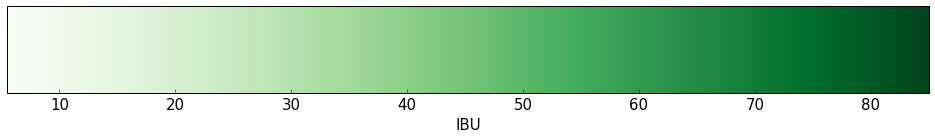

In [7]:
plt.figure(figsize=(16, 2))
ibu_img = plt.imshow(np.array([allbeerdf['average_ibu']]), cmap="Greens")
plt.gca().set_visible(False)
ax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(ibu_img,orientation='horizontal',cax=ax,label='IBU')

The IBU level of a beer related to the bittering hop content of a beer, which is why the `Greens` color bar was chosen. The higher the IBU of a beer, the hoppier and more bitter it will generally be. 

# SRM Range

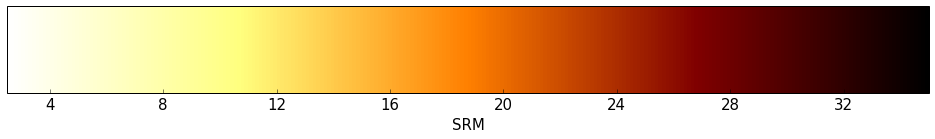

In [8]:
plt.figure(figsize=(16, 2))
srm_img = plt.imshow(np.array([allbeerdf['average_srm']]), cmap="afmhot_r")
plt.gca().set_visible(False)
ax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(srm_img,orientation='horizontal',cax=ax,label='SRM')

From this we see that a high SRM value corresponds to darker beer and lighter beers have low SRM values. This also has an effect on the taste of a beer because the type of grain used in making the beer is what gives it its color.

# IBU vs SRM 
Now that we have a sense of the range of these values, let's see if there is any correlation between them by plotting the IBU vs SRM for each beer. Additionally, we will assign the color of each point based on its srm value. We can add an additional dimension of information to this plot by assigning the size of each point based on its ABV.

In [9]:
beer_color = plt.cm.get_cmap('afmhot_r')

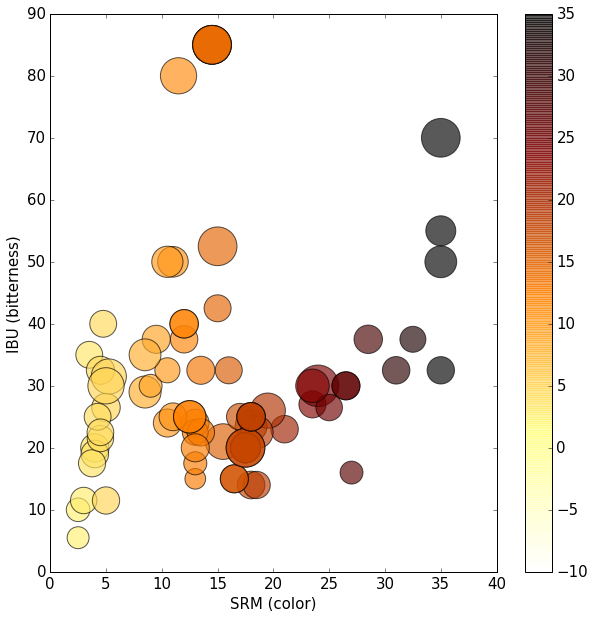

In [10]:
plt.figure(figsize=(10,10))
ibu_vs_abv = plt.scatter(allbeerdf['average_srm'],allbeerdf['average_ibu'],c=allbeerdf['average_srm'],
            vmin=-10.0,s=allbeerdf['average_abv']*150,cmap=beer_color,alpha=0.65)
plt.xlabel('SRM (color)')
plt.ylabel('IBU (bitterness)')
plt.colorbar(ibu_vs_abv)

# No clear correlation between color and bitterness

While there is no clear correlation between the color of a beer and how bitter it will be, there is still some potentially interesting grouping in this plot .The lighter beers, those with SRM values below 10 do not cover the same range of IBU values of lighter beers. Let's slice the data to get the actual values. For now I am just going to slice the groups by eye.

In [11]:
light_beers  = allbeerdf.iloc[np.where((allbeerdf['average_srm']) <= 10)]
medium_beers1 = allbeerdf.iloc[np.where((allbeerdf['average_srm'] > 10) &
                             (allbeerdf['average_srm'] <=20))]
medium_beers2 = allbeerdf.iloc[np.where((allbeerdf['average_srm'] > 20) &
                             (allbeerdf['average_srm'] <=30))]
dark_beers = allbeerdf.iloc[np.where(allbeerdf['average_srm'] > 30)]

In [12]:
print 'light  beer  IBU range: ', 'low: ' ,np.min(light_beers['average_ibu']),'high:',np.max(light_beers['average_ibu'])
print 'medium beer1 IBU range: ', 'low:' ,np.min(medium_beers1['average_ibu']),'high:',np.max(medium_beers1['average_ibu'])
print 'medium beer2 IBU range: ', 'low:' ,np.min(medium_beers2['average_ibu']),'high:',np.max(medium_beers2['average_ibu'])
print 'dark   beer  IBU range: ', 'low:' ,np.min(dark_beers['average_ibu']),'high:',np.max(dark_beers['average_ibu'])

light  beer  IBU range:  low:  5.5 high: 40.0
medium beer1 IBU range:  low: 14.0 high: 85.0
medium beer2 IBU range:  low: 16.0 high: 37.5
dark   beer  IBU range:  low: 32.5 high: 70.0


# More sophisticated slicing

As we saw from splitting the beer style up by eye using just the color resulted in a wide range a IBU values for a given slice, which does not help you narrow down what beer you might like. 
Luckily, we have more attributes to work with, as well as unsupervised clustering algorithms.


## Dendrogram's and hierarchical clustering

By creating a dendrogram we can get a sense of how many cluster we should be looking for in the data. The following [link](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering) has a great tutorial by Jörn Hees on how to do this using scipy, and a nice function fo plot nice looking dendrograms. For this clustering we will use the `ward` linkage, which minimizes the variance within the resulting clusters. This should create clusters with beer styles that are most similar.

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [14]:
def fancy_dendrogram(*args, **kwargs):
    """
    Written by Jörn Hees
    """
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

# Prepping the data

All of the attributes we wish to use in the clustering must first be zipped to have the proper shape for the scipy functions. We will use all of the available quantitative attributes for the clustering.

In [15]:
attributes = zip(allbeerdf['average_srm'],allbeerdf['average_ibu'],allbeerdf['average_og'],allbeerdf['average_fg'])

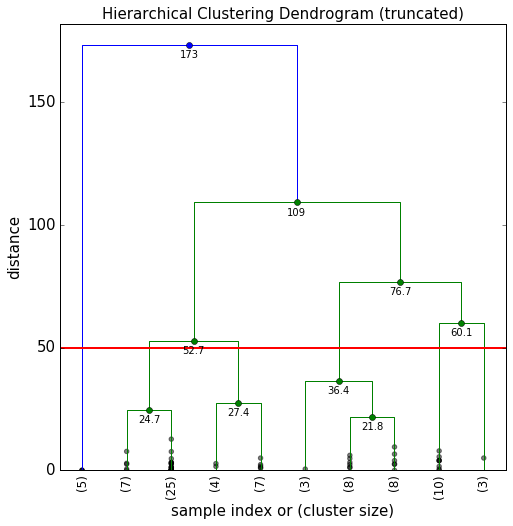

In [16]:
Z = linkage(attributes, 'ward')
plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendro = fancy_dendrogram(Z,truncate_mode='lastp',p=10,
                          leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,annotate_above=3)
plt.axhline(y=50,color='r',lw=2)


# Choosing the number of clusters

The  dendrogram illustrates a truncated picture of the hierarchical clustering. 
At the beginning of the clustering algorithm, each beer is treated as its own cluster. 
From there it will be merged with a similar beer and form a new cluster, and the distance 
between the two merged beers is calculated. It is this distance between the merged clusters 
that is shown on the y-axis. This process is repeated until all of the beers are placed into a single cluster. 
The goal of this plot is to help us set a max merged distance that best characterizes the number of clusters in the data. If this value is too low, you will have many small individual clusters. If it is too high, you might up end with too few  clusters with many members.  For this example I will chose a max merged distance of 50. Above this distance is where we  start to larger jumps in merged cluster distance. The number of vertical lines crossed by a the red horizontal line gives us the number of clusters, which in this case is 6. With this distance set, we can now classify the data into their respective clusters. There are other reasonable choices for the max distance in this example, and this would change the final number of clusters.

In [17]:
beer_clusters = fcluster(Z, 50, criterion='distance')
allbeerdf['cluster_label'] = beer_clusters

# Plotting the clusters
The previous line will return a label for each beer dataframe, 
which we can use to set the color of the markers. 
Again their size has been set by their ABV. 
Let's plot the data with a user set color so we can see exactly which cluster is which.

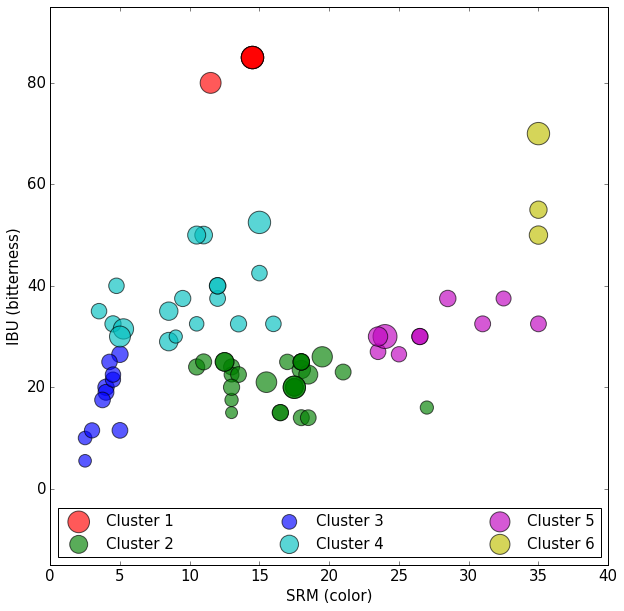

In [18]:
labels = np.arange(1,7)
colors = ['r','g','b','c','m','y']
plt.figure(figsize=(10,10))
for i,label in enumerate(labels):
    cluster_members = np.where(allbeerdf['cluster_label'] == label)
    plt.scatter(allbeerdf['average_srm'].iloc[cluster_members[0]],
                allbeerdf['average_ibu'].iloc[cluster_members[0]],
                s=allbeerdf['average_abv'].iloc[cluster_members[0]]*50,
                c = colors[i],alpha=0.65,label='Cluster '+str(label))
plt.legend(scatterpoints = 1,loc=3,ncol=3,mode="expand")
plt.ylim(-15,95)
plt.xlabel('SRM (color)')
plt.ylabel('IBU (bitterness)')

In [19]:
allbeerdf['cluster_label'] = beer_clusters

Now we can split the clusters into their own dataframes using the label with the following function. The function will also concatonate all of the aroma, falvor, and impression attributes within a given cluster into a single string. These strings will be used to make word clouds of each of these attributes in each cluster. 

In [20]:
def beer_cluster_df(dataframe,label):
    cluster = dataframe.iloc[np.where(allbeerdf['cluster_label'] == label)]
    flavor_string = ' '
    for flavor in cluster['flavor']:
        flavor_string += flavor
    aroma_string = ' '
    for aroma in cluster['aroma']:
        aroma_string += aroma
    impression_string = ' '
    for impression in cluster['impression']:
        impression_string += impression
    
    return cluster,flavor_string,aroma_string,impression_string

In [21]:
cluster1,flavor_string1,aroma_string1,impression_string1 = beer_cluster_df(allbeerdf,1)
cluster2,flavor_string2,aroma_string2,impression_string2 = beer_cluster_df(allbeerdf,2)
cluster3,flavor_string3,aroma_string3,impression_string3 = beer_cluster_df(allbeerdf,3)
cluster4,flavor_string4,aroma_string4,impression_string4 = beer_cluster_df(allbeerdf,4)
cluster5,flavor_string5,aroma_string5,impression_string5 = beer_cluster_df(allbeerdf,5)
cluster6,flavor_string6,aroma_string6,impression_string6 = beer_cluster_df(allbeerdf,6)

# Cluster word clouds

With the quantitative attributes it was possible to use hierarchical clustering to find the different clusters within the data. This is not possible with the qualitative attributes. Using word clouds, however, we can explore some of the shared characteristics among the the beers in each cluster.  

Specifically we will look at the following:

* aroma
* flavor
* impression

The word clouds will be constructed by merging all of these attributes in a given cluster into a single string, 
allowing us to determine how frequently certain words come up in a single cluster.

To make the word clouds we will use the `wordcloud` [module](https://github.com/amueller/word_cloud) written by Andreas Mueller.

In [22]:
from wordcloud import WordCloud

# Removing common words
Before making the word clouds we need a list of common words that should not be included when constructing the cloud. These are words such as "of","the","a". There are a number of common word lists available on-line, 
but I have chosen to use the list from this [repo](https://github.com/first20hours/google-10000-english). I have also added some words to the list that are common among all of the beers and would not add to the analysis.

In [23]:
common_words = np.loadtxt('google-10000-english-usa.txt',usecols=(0,),dtype=str)

In [24]:
def make_clouds(cluster_name,flavor_string,aroma_string,impression_string):
    """
    create and return the word cloud for the flavor, aroma,
    and impression attributes in a given cluster
    """
    flavor_wordcloud = WordCloud(max_font_size=35, relative_scaling=.55,
                          stopwords=(common_words)).generate(flavor_string)
    aroma_wordcloud = WordCloud(max_font_size=35, relative_scaling=.55,
                          stopwords=(common_words)).generate(aroma_string)
    impression_wordcloud = WordCloud(max_font_size=35, relative_scaling=.55,
                          stopwords=(common_words)).generate(impression_string)
    return flavor_wordcloud,aroma_wordcloud,impression_wordcloud

In [25]:
flavor_wordcloud1,aroma_wordcloud1,impression_wordcloud1 = make_clouds(
    'Cluster 1',flavor_string1,aroma_string1,impression_string1)
flavor_wordcloud2,aroma_wordcloud2,impression_wordcloud2 = make_clouds(
    'Cluster 2',flavor_string2,aroma_string2,impression_string2)
flavor_wordcloud3,aroma_wordcloud3,impression_wordcloud3 = make_clouds(
    'Cluster 3',flavor_string3,aroma_string3,impression_string3)
flavor_wordcloud4,aroma_wordcloud4,impression_wordcloud4 = make_clouds(
    'Cluster 4',flavor_string4,aroma_string4,impression_string4)
flavor_wordcloud5,aroma_wordcloud5,impression_wordcloud5 = make_clouds(
    'Cluster 5',flavor_string5,aroma_string5,impression_string5)
flavor_wordcloud6,aroma_wordcloud6,impression_wordcloud6 = make_clouds(
    'Cluster 6',flavor_string6,aroma_string6,impression_string6)

In [26]:
def compare_clouds(cloud_type):
    """
    This is just a function to plot the word clouds for each cluster next to one
    another for easier comparison.
    """
    if cloud_type == 'flavor':
        wordcloud1 = flavor_wordcloud1
        wordcloud2 = flavor_wordcloud2
        wordcloud3 = flavor_wordcloud3
        wordcloud4 = flavor_wordcloud4
        wordcloud5 = flavor_wordcloud5
        wordcloud6 = flavor_wordcloud6
    if cloud_type == 'aroma':
        wordcloud1 = aroma_wordcloud1
        wordcloud2 = aroma_wordcloud2
        wordcloud3 = aroma_wordcloud3
        wordcloud4 = aroma_wordcloud4
        wordcloud5 = aroma_wordcloud5
        wordcloud6 = aroma_wordcloud6
    if cloud_type == 'impression':
        wordcloud1 = impression_wordcloud1
        wordcloud2 = impression_wordcloud2
        wordcloud3 = impression_wordcloud3
        wordcloud4 = impression_wordcloud4
        wordcloud5 = impression_wordcloud5
        wordcloud6 = impression_wordcloud6
    fig = plt.figure(figsize=(16,16))
    ax1 = plt.subplot(321)
    ax2 = plt.subplot(322)
    ax3 = plt.subplot(323)
    ax4 = plt.subplot(324)
    ax5 = plt.subplot(325)
    ax6 = plt.subplot(326)
    ax1.imshow(wordcloud1)
    ax1.axis("off")
    ax1.set_title('Cluster 1 ' + cloud_type + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster1['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster1['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster1['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster1['average_og'])))
    ax2.imshow(wordcloud2)
    ax2.axis("off")
    ax2.set_title('Cluster 2 ' + cloud_type + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster2['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster2['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster2['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster2['average_og'])))
    
    ax3.imshow(wordcloud3)
    ax3.axis("off")
    ax3.set_title('Cluster 3 ' + cloud_type + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster3['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster3['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster3['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster3['average_og'])))
    
    ax4.imshow(wordcloud4)
    ax4.axis("off")
    ax4.set_title('Cluster 4 ' + cloud_type + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster4['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster4['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster4['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster4['average_og'])))
    
    ax5.imshow(wordcloud5)
    ax5.axis("off")
    ax5.set_title('Cluster 5 ' + cloud_type + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster5['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster5['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster5['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster5['average_og'])))
    
    ax6.imshow(wordcloud6)
    ax6.axis("off")
    ax6.set_title('Cluster 6 ' + cloud_type + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster6['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster6['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster6['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster6['average_og'])))

    plt.show()

# Cloud comparisons

In the next 3 figures we will plot the aroma, flavor, and impression word clouds for all 6 clusters side-by-side. 
This will allow us to see what characteristics are most predominate in each cluster, and how the clusters differ. 
In the title of each word cloud will be the vital statistics of each cluster.

* Average SRM
* Average IBU
* Average ABV
* Average OG

These values will provide a sense of how these autistics change between clusters.

### Aroma comparisons 

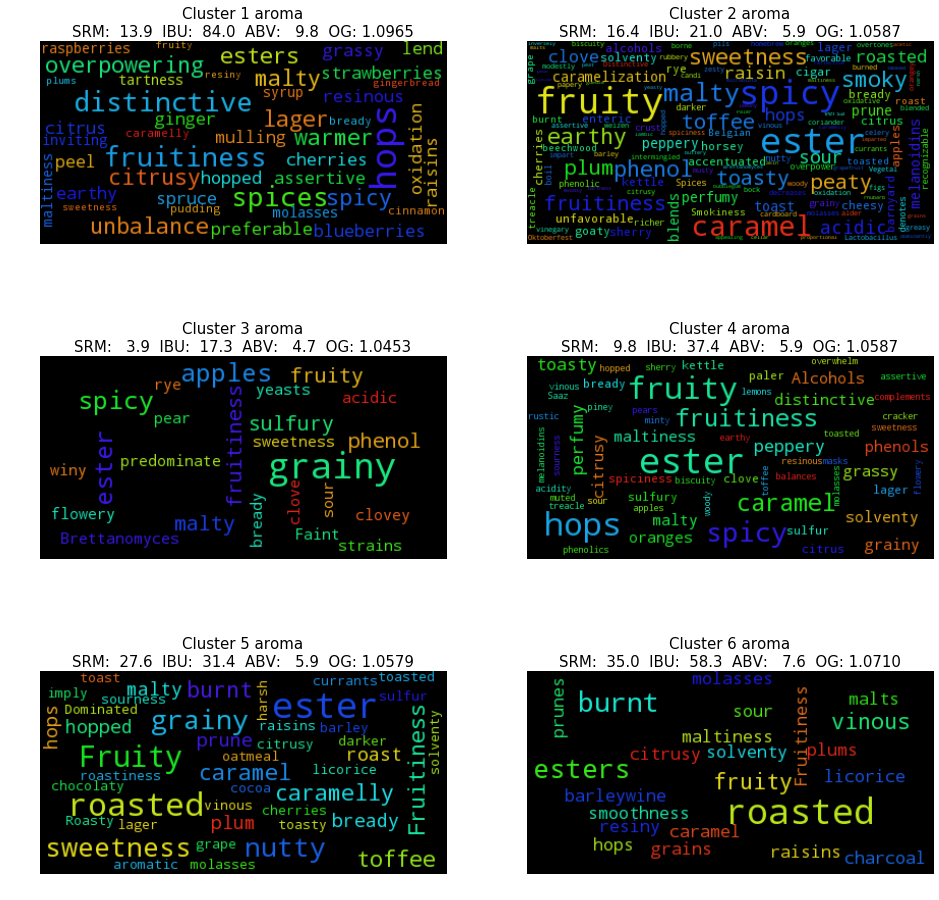

In [27]:
compare_clouds('aroma')

### Flavor Comparisons

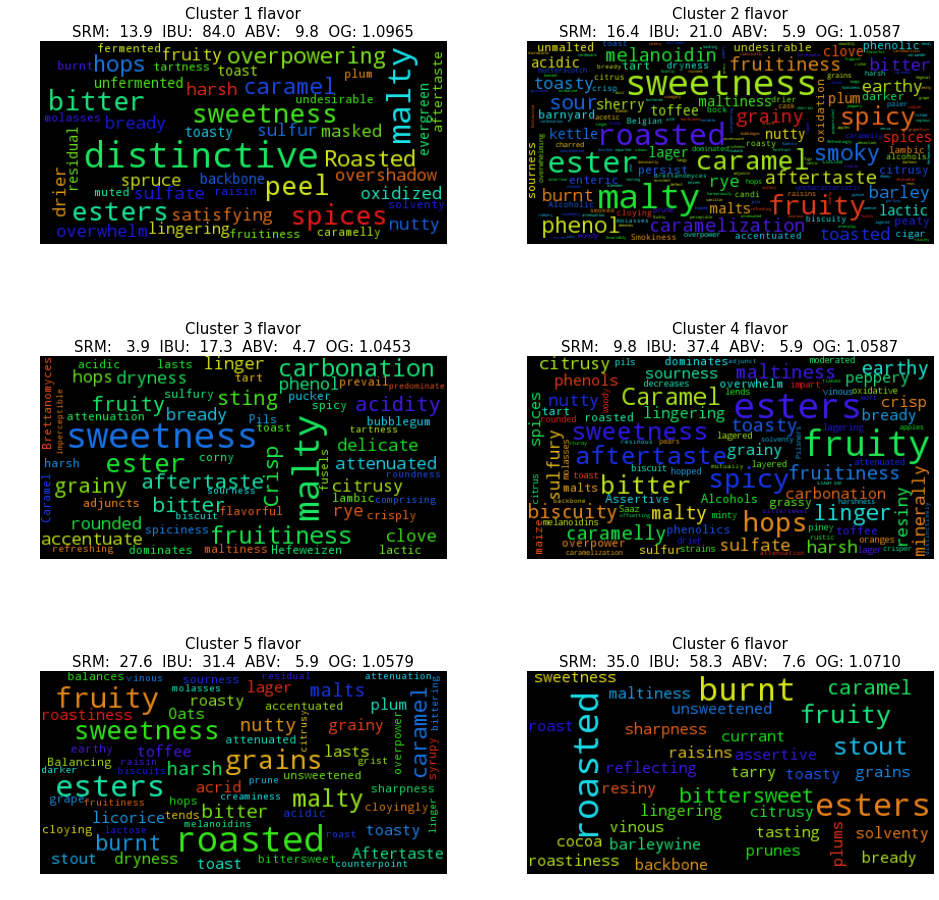

In [28]:
compare_clouds('flavor')

### Impression Comparisons

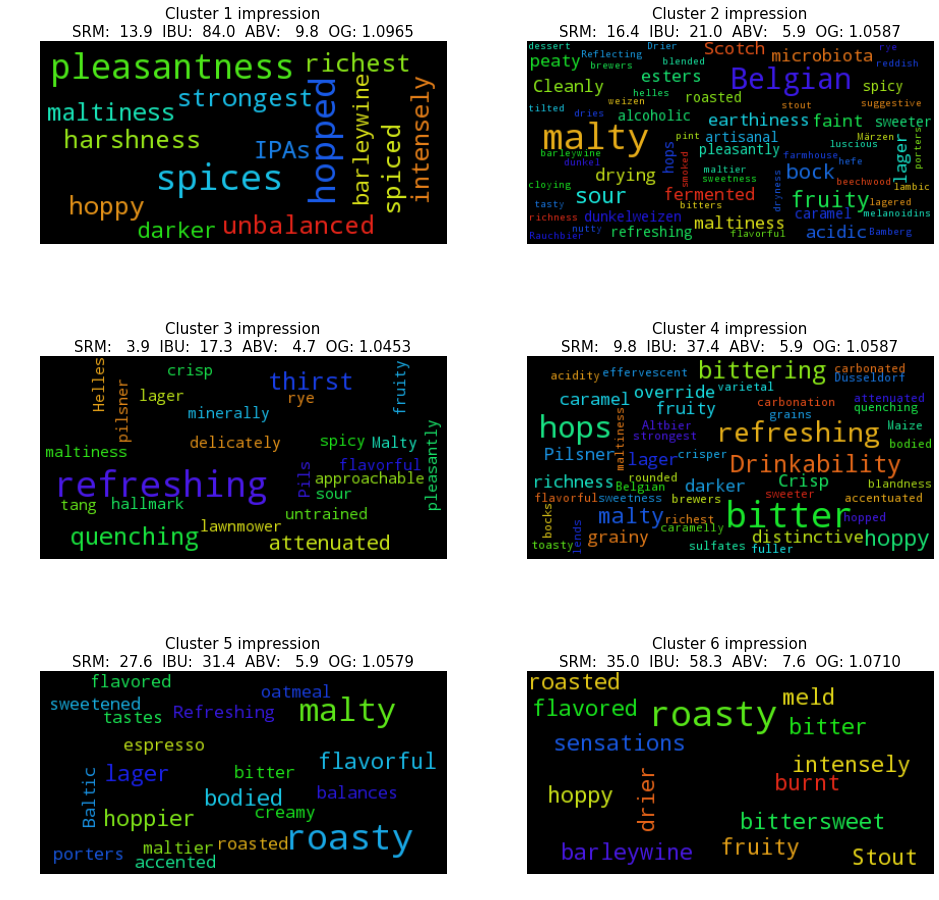

In [29]:
compare_clouds('impression')

# What does it all mean?
With these word clouds one could start to narrow down what types of beers they might like based on the major 
aromas, flavors, and impressions in each cloud.  If for example, you are a person who knows they do not like bitter or hoppy beers, it would probably be best to avoid the beers in Cluster 1. If you are the type of person who enjoys roasted flavors then cluster 5 would likely contain groups of beers you would enjoy. In cluster 2 all of the word clouds are very dense, suggesting a wide range of types and flavors of beer.

# What is an "approachable beer"?
If you look at the impression word cloud for cluster 3, you will see that one of the words is approachable. Let's plot the impression word cloud again to have a closer look.

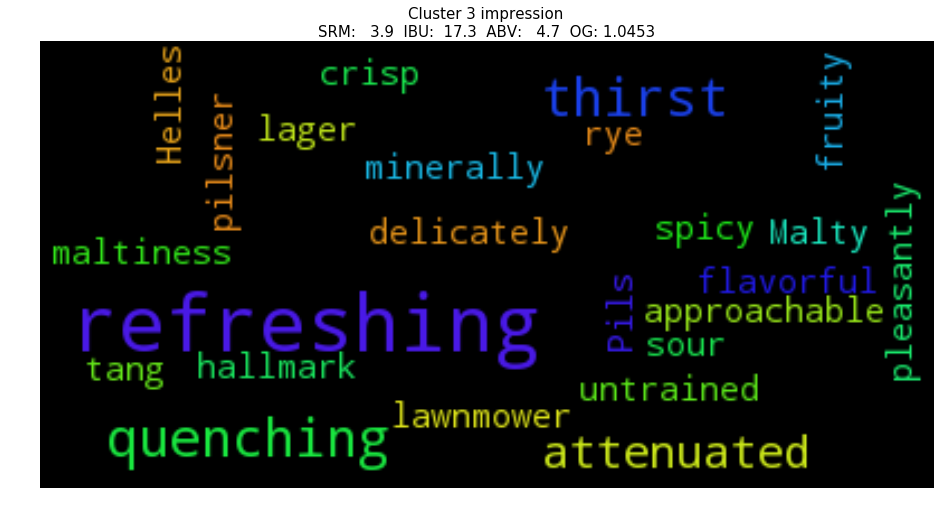

In [30]:
plt.figure(figsize=(16,16))
plt.imshow(impression_wordcloud3)
plt.axis("off")
plt.title('Cluster 3 ' + 'impression' + '\n'
                  + 'SRM: '+str('%5.1f'%np.mean(cluster3['average_srm']))
                  +'  IBU: ' +str('%5.1f'%np.mean(cluster3['average_ibu']))
                  +'  ABV: ' +str('%5.1f'%np.mean(cluster3['average_abv']))
                  +'  OG: ' +str('%5.4f'%np.mean(cluster3['average_og'])))

We can look up the names of the beers in the group as well as some commercial examples to get a sense of what these approachable beers might include.

In [31]:
for name in cluster3['name']:
    print name.replace('         ','')

Lite American Lager
Standard American Lager
Premium American Lager
Munich Helles
Dortmunder Export
Cream Ale
Blonde Ale
Kölsch
American Wheat or Rye Beer
Weizen/Weissbier
Berliner Weisse


Some of these beer names might sound familiar, but we also have commercial examples 
of each type of beer in the dataframe that can easily be accessed.

In [32]:
def get_examples(beer_cluster):
    for i,name in enumerate(beer_cluster['name']):
        print 'Beer style: ',name.replace('         ','')
        beers = beer_cluster['examples'].iloc[i].split(',')[0:2]
        if len(beers) > 1:
            print 'Commercial examples: ',beers[0].replace('         ',''),',',beers[-1]+'\n'
        else:
            print 'Commercial examples: ',beers[0].replace('         ','')+'\n'
    return

In [33]:
get_examples(cluster3)

Beer style:  Lite American Lager
Commercial examples:    Miller Lite ,  Bud Light

Beer style:  Standard American Lager
Commercial examples:    Miller High Life ,  Budweiser

Beer style:  Premium American Lager
Commercial examples:    Miller Genuine Draft ,  Michelob

Beer style:  Munich Helles
Commercial examples:    Hacker-Pschorr Münchner Helles ,  Paulaner Premium Lager

Beer style:  Dortmunder Export
Commercial examples:    DAB Export ,  Dortmunder Union Export

Beer style:  Cream Ale
Commercial examples:    Genesee Cream Ale ,  Little Kings Cream Ale (Hudepohl)

Beer style:  Blonde Ale
Commercial examples:    Redhook Blonde ,  Catamount Gold

Beer style:  Kölsch
Commercial examples:    Available in Cologne only: PJ Früh ,  Hellers

Beer style:  American Wheat or Rye Beer
Commercial examples:    Bell's Oberon ,  Anchor Summer Beer

Beer style:  Weizen/Weissbier
Commercial examples:    Schneider Weisse Original (unusual in its amber color) ,  Paulaner Hefe-Weizen

Beer style:  Berl

# The approachable beers

From this we see that some of these approachable beers include very common american beers:

`Beer style:    Lite American Lager  Commercial examples:    Miller Lite  , Bud Light`

`Beer style:    Standard American Lager Commercial examples:    Miller High Life , Budweiser`

`Beer style:    Premium American Lager Commercial examples:    Miller Genuine , Draft  Michelob`

However, with this type of clustering, someone who enjoys these common style of beers might also like the other styles that are respresented in this cluster.


# Beer recommendations

Through the hierarchical clustering, we were able to put a label on each beer from the style guide, allowing us to suggest similar beers. This will provide a different list of suggested beers that one would get from just simply choosing beers in the same subcategory within the BJCP guidebook.

Let's say for example, a person knows they really enjoy American IPA

The first thing we will need to do is get the label of that style of beer.

In [34]:
rec_label = allbeerdf['cluster_label'].iloc[np.where(allbeerdf['name'] == 'American IPA')]

In [35]:
rec_label

49    4
Name: cluster_label, dtype: int32

From the previous line we see that American IPA's belong to cluster 4. We can now use the previously defined function to get the other examples in the cluster.

In [36]:
get_examples(cluster4)

Beer style:  German Pilsner (Pils)
Commercial examples:    Bitburger ,  Warsteiner

Beer style:  Bohemian Pilsener
Commercial examples:    Pilsner Urquell ,  Budweiser Budvar (Czechvar in the US)

Beer style:  Classic American Pilsner
Commercial examples:    Occasional brewpub and microbrewery specials

Beer style:  Maibock/Helles Bock
Commercial examples:    Ayinger Maibock ,  Hacker-Pschorr Hubertus Bock

Beer style:  Northern German Altbier
Commercial examples:    DAB Traditional ,  Hannen Alt

Beer style:  California Common Beer
Commercial examples:    Anchor Steam ,  Southampton West Coast Steam Beer

Beer style:  Düsseldorf Altbier
Commercial examples:    Altstadt brewpubs: Zum Uerige ,  Im Füchschen

Beer style:  Standard/Ordinary Bitter
Commercial examples:    Boddington's Pub Draught ,  Fuller's Chiswick Bitter

Beer style:  Special/Best/Premium Bitter
Commercial examples:    Fuller's London Pride ,  Coniston Bluebird Bitter

Beer style:  Extra Special/Strong Bitter (English P

This reccomended selection is much larger than what one would get from just selecting other beers from the IPA category in the guidebook.

# More complicated recommendations

It would be possible to use additional methods to recommend new beers. 
One option is to have a user select and rate, with positive and negative values, 
some of the qualitative attributes for the beers. This would provide a dictionary of key value pairs.

For example:

`{'hoppy':-5,'sweet':2,'matly':0,'roasty':3}`

With this dictionary we could search the aroma, flavor, 
and impression strings for these keys and sum their values, giving us 
a positive or negative score for each beer. This is, in a sense, a sentiment 
analysis of the beers based on these attributes. This type of analysis would provide a 
list of beers a user might want to try, those with highly positive ratings, and those to avoid.

I will add this type of analysis and recommendation in the future.

